In [24]:
import pandas as pd
from numpy.random import seed
seed(1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [25]:
#Load in our data, drop NaN values
data = pd.read_csv("../Data/data.csv")
data.dropna

<bound method DataFrame.dropna of       Country  Sex   Age  Marriage duration (years)  Number of children  \
0     Brazil     1  21.0                        2.0                   0   
1     Brazil     1  29.0                        3.0                   1   
2     Brazil     1  30.0                        7.0                   0   
3     Brazil     1  30.0                        7.0                   1   
4     Brazil     1  28.0                        9.0                   0   
5     Brazil     1  39.0                        9.0                   1   
6     Brazil     1  30.0                        7.0                   2   
7     Brazil     1  40.0                       20.0                   2   
8     Brazil     2  43.0                       22.0                   2   
9     Brazil     2  34.0                        2.0                   1   
10    Brazil     2  52.0                       27.0                   2   
11    Brazil     1  33.0                        4.0               

In [26]:
#Assign X and y values 
X = data[["Country","Sex","Age","Number of children","Number of brought up children","Education","Material Status","Religion","Religiosity (1-not religious at all, 7-extremely religious)","Pension (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)","Marriage Satisfaction"]]
y = data["Marriage duration (years)"].values.reshape(-1, 1)
print(X.shape, y.shape)



(6767, 11) (6767, 1)


In [27]:
#Numerically categorize our categorical data
data2 = X.copy()
data_binary_encoded = pd.get_dummies(data2, columns=["Country","Sex","Education","Material Status","Religion",])
data_binary_encoded.columns



Index(['Age', 'Number of children', 'Number of brought up children',
       'Religiosity (1-not religious at all, 7-extremely religious)',
       'Pension (1-strongly agree, 4-neither agree nor disagree, 7-strongly disagree)',
       'Marriage Satisfaction', 'Country_Brazil ', 'Country_Bulgaria',
       'Country_China', 'Country_Croatia', 'Country_Estonia',
       'Country_Germany', 'Country_Ghana', 'Country_HongKong',
       'Country_Hungary', 'Country_India', 'Country_Iran ', 'Country_Italy',
       'Country_Kazakhstan', 'Country_Malaysia', 'Country_Mexico',
       'Country_Nigeria ', 'Country_Pakistan', 'Country_Poland ',
       'Country_Portugal', 'Country_Russia', 'Country_Saudi Arabia',
       'Country_Slovakia', 'Country_South Korea', 'Country_Spain ',
       'Country_Switzerland', 'Country_Turkey ', 'Country_U.K.',
       'Country_Uganda', 'Sex_1', 'Sex_2',
       'Education_High School or Technical College',
       'Education_Masters Degree', 'Education_No Education',
       '

R2 Score: 0.8195212105023134


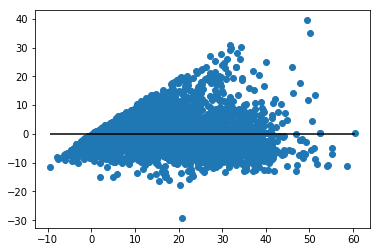

<Figure size 432x288 with 0 Axes>

In [28]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)
score = model.score(X_train, y_train)
print(f"R2 Score: {score}")
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
plt.savefig("../Graphs/Residual.png")


In [29]:
coeff = (model.coef_)
features = sorted(zip(coeff[0],X.columns))
features

[(-6.431555363328326, 'Religion_Evangelic'),
 (-3.6987914120232697, 'Country_Nigeria '),
 (-3.504326665511536, 'Country_Ghana'),
 (-2.9347946443261024, 'Country_Germany'),
 (-2.6306503957921503, 'Country_Uganda'),
 (-2.0507976651349056, 'Country_Malaysia'),
 (-1.686269755422049, 'Education_Masters Degree'),
 (-1.454674583317976, 'Country_Bulgaria'),
 (-1.2907400172955623, 'Country_Mexico'),
 (-1.2723016303439914, 'Religion_Spiritualism'),
 (-1.1181844746724126, 'Religion_Jewish'),
 (-0.8893762370331666, 'Country_India'),
 (-0.8699908614100192, 'Country_South Korea'),
 (-0.738132177422046, 'Country_Switzerland'),
 (-0.6564286341707636, 'Country_Spain '),
 (-0.44690054283006964, 'Number of brought up children'),
 (-0.3936183771708581, 'Material Status_Better than average'),
 (-0.3700679656713668, 'Education_High School or Technical College'),
 (-0.18677900503582512, 'Material Status_Average'),
 (-0.1691402541195967,
  'Pension (1-strongly agree, 4-neither agree nor disagree, 7-strongly d

In [30]:
prediction = pd.DataFrame(predictions)


In [31]:
data2 = data.groupby("Country")["Marriage duration (years)"].mean()
grouped = data2.reset_index()
Grouped = grouped.sort_values("Marriage duration (years)", ascending=True)



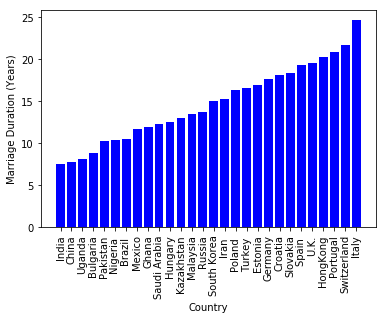

<Figure size 3600x1440 with 0 Axes>

In [32]:
plt.bar(Grouped["Country"],Grouped["Marriage duration (years)"],color="blue")
plt.xlabel("Country")
plt.ylabel("Marriage Duration (Years)")
plt.xticks(rotation=90)
plt.figure(figsize=(50,20))
plt.savefig("../Graphs/DurationSummary.png")
Grouped.to_csv("../Data/Grouped.csv")

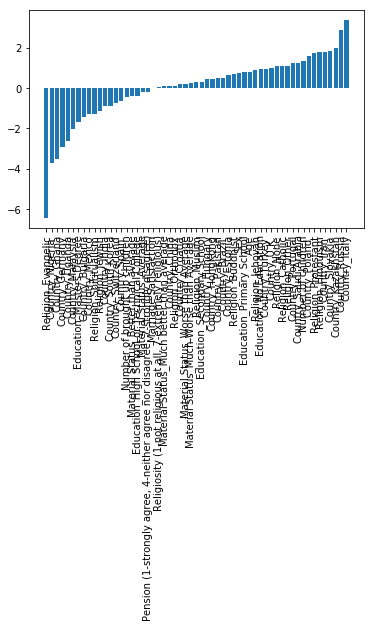

<Figure size 1440x720 with 0 Axes>

In [33]:
Features = pd.DataFrame(features)
Features
plt.bar(Features[1],Features[0])
plt.xticks(rotation=90)
plt.figure(figsize=(20,10))
Features.to_csv("../Data/Features.csv")



In [34]:
Predictions = pd.DataFrame(predictions)
Predictions.to_csv("../Data/Predictions.csv")

In [35]:
prediction
data5 = data["Marriage duration (years)"]
prediction["Actual"] = data5
prediction.to_csv("../Data/Comparison.csv")
